# Introduction

This notebook shows how object detection can be done on your own dataset by training YOLOv2. I am going to use soccer playing images as training dataset as an example to detect soccer ball. After finishing this notebook, you will be able to train your own model, and detect objects that you are interested in.

It is really your choice which implementation to use. I happened to choose [darkflow](https://github.com/thtrieu/darkflow) which has been quite popular for Tensorflow support on Github open source hosting service. However, you can build the YOLO model on your own since the [official web-site](https://pjreddie.com/darknet/yolo/) provides its pre-trained weights as an external file.

Here is another choice of implementation called, [tensornets](https://github.com/taehoonlee/tensornets). Please check it out.

## Preparing the Data

__1. Search for your interest__

__2. Collect media files for training (image, video)__
  - Be aware of what your **problem domain** is
    - For example, the wide camera angle shot for a soccer play, the soccer ball is very tiny. However, the ball size gets pretty bigger with the close-up camera shot. These two different types of photo mean the different domains. 
    - In my case, I **collected pictures of only close-up camera shot**.
    - Also, the collected pictures are **soley from 2018 Russia World Cup games**.

__3. Collect media files for testing (image, video)__
  - It is a common sense not to use the same data from the training process for testing purpose. 
  - I just chose some random pictures and a video from internet to check if the trained algorithm performs well with un-seen dataset

__4. If your media file is video, make a lot of screenshot__
  - Here is how to take a bulk screenshot [LINK](https://pibby.livejournal.com/164326.html)
  
__5. Make annotations with drawing rectangles__
  <div stlye="text-align:center;">
      <img src="https://raw.githubusercontent.com/tzutalin/labelImg/master/demo/demo3.jpg"/ style="width:500px;">
  </div>
  
  - Here is a tool to do it [LINK](https://github.com/tzutalin/labelImg)

## Downloading my dataset

I have collected dataset from several youtube videos of highlights in 2018 Russia World Cup. Here is a breif steps how I have done.
1. **downloaded several videos** of highlights in 2018 Russia World Cup from Youtube.
2. produced a bunch of **bulk screenshots** using VLC player.
3. **kept images** that I am **only interested** in.
4. used [LabelImg](https://github.com/tzutalin/labelImg) software to **make annotations** in each image.
5. **located images in './images/' directory and annotations in './annotations/' directory**.

Below is the link of my work. If you want to train on your own machine, please download **'soccer_ball_data.zip'** file and unzip it. You will see three separate folders. **Two of them(images, annotations)** are explained above, and **sample_video folder** contains a sample_video file to verify the result.

https://drive.google.com/drive/folders/1th1odcC5kjEnkZmwooETYlyLsz5AOTph?usp=sharing

## Importing Dependencies

In [1]:
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from darkflow.net.build import TFNet
import cv2

## Making Your Own Configuration File (cfg)

You need to make a slight change on the configuration file (\*.cfg) to adjust existing model to fit into your own dataset. For example, YOLOv2's CNN model is trained on ImageNet dataset which contains a number of different object classes. However, I only want **one (soccer ball)** object class to detect.

You should do the following to make that change according to Darflow's official explanation.

1. __Copy__ one of the pre-trained configuration file that you are going to use.
  - In my case, I used yolo.cfg.
  
2. __Rename__ the copied configuration file to your custom name
  - In my case, I changed the name yolo.cfg to yolo_custom.cfg.
  
3. Open the configuration file and __change classes in the \[region\] layer__ (the last layer) to the number of classes you are going to train for. 
  - In my case, classes are set to 1.
  
4. __change filters in the \[convolutional\] layer__ (the second to last layer) to num * (classes + 5). 
  - In my case, num is 5 and classes are 1 so 5 * (1 + 5) = 30 therefore filters are set to 30.

## Specifying Classes of Your Interest

You also need to changes __'labels.txt'__ file included in the root directory. Just specify names of objects. In my case, I removed all text and left __'ball'__ instead.

## Downloading Pre-trained Weights

Please go [here](https://drive.google.com/drive/folders/0B1tW_VtY7onidEwyQ2FtQVplWEU) and **download a pre-trained weights** that you are interested. In my case, I downloaded **yolo.weights**. After downloading is done, **locate the file into 'bin'** directory in the root directory.

<div style="text-align:center;">
    <img src="https://raw.githubusercontent.com/deep-diver/Object-Detection-YOLOv2-Darkflow/master/weights.PNG"/>
</div>

## Defining Model Options & Build the Model

Before building the model, you need to define options. 

__1. model__: **configuration** file (\*.cfg) that you have defined for your situation

__2. load__: **pre-trained weight** file

__3. batch__: a number of data to train per a batch
  - I set batch size 8 because my GPU card couldn't handle bigger size. My GPU card is **NVIDIA GTX 1080Ti**.

__4. epoch__: how many iterations to train
  - I probably need to set this a bit smaller, but as the result shows I think 100 epochs are just fine

__5. gpu__: set **1.0** if you want to fully utilize your GPU hardware. Otherwise, remove this option.

__6. train__: set **'True'** if your purpose is training

__7. annotation__: **directory** where the annotation files are stored

__8. dataset__: **directory** where the image files are stored

In [6]:
options = {"model": "cfg/yolo_tiny.cfg", 
           "load": "yolo-tiny.weights",
           "batch": 8,
           "epoch": 100,
           "gpu": 0,
           "train": True,
           "annotation": "./custom_dataset/images/ann/",
           "dataset": "./custom_dataset/images/img/"}

In [7]:
tfnet = TFNet(options)

C:\Users\i321584\AppData\Local\Continuum\miniconda3\envs\carnd-term1\lib\site-packages\darkflow\dark\darknet.py:54: UserWarning: ./cfg/yolo-tiny.cfg not found, use cfg/yolo_tiny.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo_tiny.cfg
Loading yolo-tiny.weights ...
Successfully identified 180357512 bytes
Finished in 0.06856775283813477s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  

## Training the Model

Training took about **an hour** on NVIDIA GTX 1080Ti

In [ ]:
tfnet.train()


cfg/yolo_tiny.cfg parsing ./custom_dataset/images/ann/
Parsing for ['licensePlate'] 
['0073797c-a755-4972-b76b-8ef2b31d44ab___new_IMG_20160315_071740.xml', '00b42b2c-f193-4863-b92c-0245cbc816da___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_Nissan-Terrano-Petrol-Review-Images-Black-Front-Angle.xml', '00b6b9f3-65b7-48d5-b85e-51869c9543d5___cb138a022bc70202aa975a85fe57cc75__1.xml', '00c0488a-a3e5-4c1e-9758-154e767557fd___maxresdefault.xml', '018b52e6-e9a1-42c2-8ce7-0617e8c8e021___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_sbtb02_auto1.xml', '01d7a3a8-650b-4944-a275-f8bcb262f038___px106_7406_7_0.xml', '025d7554-f70f-4805-ab78-121a7c65dd2e___10.xml', '02883da0-4e7e-4fc4-a685-94b0995dadf9___White-2BPlate.xml', '02889b92-480e-4c14-ba02-b688a2477d2c___256932.xml', '02fb59ba-03b8-414c-b868-97c661c5e0aa___1419012553_8e7339f62b_o.xml', '03273806-bb1e-48da-8c8b-a0133a90197a___2014-Skoda-Yeti-Test-Drive.xml', '0369b20e-b432-4409-90f9-2420877aa386___8151536c79159a1557421da5f27f9f0e.xml', '039155ac-5f32-4e48-9d5

[====================>]100%  fea26b1c-01f7-47ba-9d72-a8dab0edcf17___fancy-number-plates-for-your-cars-500x500.xmlmber-Plates-Design.xml_ii_2_7_tdi_se_4x4_3330085523722771900.xmlll78329632_n.xml
Statistics:
licensePlate: 788
Dataset size: 743
Dataset of 743 instance(s)
Training statistics: 
	Learning rate : 1e-05
	Batch size    : 8
	Epoch number  : 100
	Backup every  : 2000
step 1 - loss 106.76899719238281 - moving ave loss 106.76899719238281
step 2 - loss 106.75875854492188 - moving ave loss 106.76797332763672
step 3 - loss 106.70481872558594 - moving ave loss 106.76165786743165
step 4 - loss 106.69630432128906 - moving ave loss 106.7551225128174
step 5 - loss 106.6822738647461 - moving ave loss 106.74783764801028
step 6 - loss 106.64547729492188 - moving ave loss 106.73760161270144
step 7 - loss 106.68179321289062 - moving ave loss 106.73202077272036
step 8 - loss 106.63375091552734 - moving ave loss 106.72219378700106
step 9 - loss 106.66477966308594 - moving ave loss 106.71645237460

step 112 - loss 106.30200958251953 - moving ave loss 106.38078280105776
step 113 - loss 106.29609680175781 - moving ave loss 106.37231420112778
step 114 - loss 106.2677001953125 - moving ave loss 106.36185280054626
step 115 - loss 106.28724670410156 - moving ave loss 106.35439219090179
step 116 - loss 106.45588684082031 - moving ave loss 106.36454165589365
step 117 - loss 106.34557342529297 - moving ave loss 106.36264483283358
step 118 - loss 106.27876281738281 - moving ave loss 106.35425663128851
step 119 - loss 106.24818420410156 - moving ave loss 106.34364938856982
step 120 - loss 106.26490020751953 - moving ave loss 106.3357744704648
step 121 - loss 106.27023315429688 - moving ave loss 106.32922033884802
step 122 - loss 106.27230072021484 - moving ave loss 106.32352837698471
step 123 - loss 106.32565307617188 - moving ave loss 106.32374084690343
step 124 - loss 106.23416900634766 - moving ave loss 106.31478366284786
step 125 - loss 106.25161743164062 - moving ave loss 106.308467039

step 226 - loss 105.78547668457031 - moving ave loss 105.83355745750478
step 227 - loss 105.98405456542969 - moving ave loss 105.84860716829726
step 228 - loss 105.76375579833984 - moving ave loss 105.84012203130152
step 229 - loss 105.8814926147461 - moving ave loss 105.84425908964599
step 230 - loss 105.79940795898438 - moving ave loss 105.83977397657983
step 231 - loss 105.7452621459961 - moving ave loss 105.83032279352147
step 232 - loss 105.71444702148438 - moving ave loss 105.81873521631778
step 233 - loss 105.701904296875 - moving ave loss 105.8070521243735
step 234 - loss 105.73138427734375 - moving ave loss 105.79948533967053
step 235 - loss 105.79724884033203 - moving ave loss 105.79926168973668
step 236 - loss 105.67874145507812 - moving ave loss 105.78720966627083
step 237 - loss 105.93107604980469 - moving ave loss 105.80159630462423
step 238 - loss 105.6519775390625 - moving ave loss 105.78663442806806
step 239 - loss 105.763916015625 - moving ave loss 105.78436258682376


step 340 - loss 105.05964660644531 - moving ave loss 105.16393037442403
step 341 - loss 105.07499694824219 - moving ave loss 105.15503703180585
step 342 - loss 105.05384826660156 - moving ave loss 105.14491815528542
step 343 - loss 105.03468322753906 - moving ave loss 105.13389466251078
step 344 - loss 105.12295532226562 - moving ave loss 105.13280072848627
step 345 - loss 105.03990173339844 - moving ave loss 105.12351082897749
step 346 - loss 105.03036499023438 - moving ave loss 105.11419624510317
step 347 - loss 105.03260040283203 - moving ave loss 105.10603666087607
step 348 - loss 105.23664855957031 - moving ave loss 105.1190978507455
step 349 - loss 105.01395416259766 - moving ave loss 105.10858348193072
step 350 - loss 105.00255584716797 - moving ave loss 105.09798071845445
step 351 - loss 105.05230712890625 - moving ave loss 105.09341335949964
step 352 - loss 104.99612426757812 - moving ave loss 105.08368445030749
step 353 - loss 105.00494384765625 - moving ave loss 105.07581039

step 455 - loss 104.24614715576172 - moving ave loss 104.34113707767753
step 456 - loss 104.24583435058594 - moving ave loss 104.33160680496837
step 457 - loss 104.23995971679688 - moving ave loss 104.32244209615122
step 458 - loss 104.20321655273438 - moving ave loss 104.31051954180954
step 459 - loss 104.21472930908203 - moving ave loss 104.30094051853679
step 460 - loss 104.63289642333984 - moving ave loss 104.33413610901711
Finish 5 epoch(es)
step 461 - loss 104.27838897705078 - moving ave loss 104.32856139582049
step 462 - loss 104.16377258300781 - moving ave loss 104.31208251453923
step 463 - loss 104.24130249023438 - moving ave loss 104.30500451210874
step 464 - loss 104.17402648925781 - moving ave loss 104.29190670982365
step 465 - loss 104.1469497680664 - moving ave loss 104.27741101564793
step 466 - loss 104.1787109375 - moving ave loss 104.26754100783313
step 467 - loss 104.12437438964844 - moving ave loss 104.25322434601466
step 468 - loss 104.14886474609375 - moving ave lo

step 569 - loss 103.2505874633789 - moving ave loss 103.40828574220097
step 570 - loss 103.24095916748047 - moving ave loss 103.39155308472893
step 571 - loss 103.33399963378906 - moving ave loss 103.38579773963494
step 572 - loss 103.2367935180664 - moving ave loss 103.3708973174781
step 573 - loss 103.26154327392578 - moving ave loss 103.35996191312287
step 574 - loss 103.2984619140625 - moving ave loss 103.35381191321683
step 575 - loss 103.2869644165039 - moving ave loss 103.34712716354554
step 576 - loss 103.20183563232422 - moving ave loss 103.33259801042341
step 577 - loss 103.20941162109375 - moving ave loss 103.32027937149044
step 578 - loss 103.231689453125 - moving ave loss 103.31142037965391
step 579 - loss 103.15495300292969 - moving ave loss 103.29577364198148
step 580 - loss 103.25102233886719 - moving ave loss 103.29129851167006
step 581 - loss 103.156005859375 - moving ave loss 103.27776924644056
step 582 - loss 103.13352966308594 - moving ave loss 103.2633452881051
st

step 684 - loss 102.26449584960938 - moving ave loss 102.26041927599752
step 685 - loss 102.1571273803711 - moving ave loss 102.25009008643488
step 686 - loss 102.10545349121094 - moving ave loss 102.23562642691249
step 687 - loss 102.15540313720703 - moving ave loss 102.22760409794195
step 688 - loss 102.04550170898438 - moving ave loss 102.2093938590462
step 689 - loss 102.2052993774414 - moving ave loss 102.20898441088573
step 690 - loss 102.13066101074219 - moving ave loss 102.20115207087139
step 691 - loss 102.04106140136719 - moving ave loss 102.18514300392097
step 692 - loss 102.04528045654297 - moving ave loss 102.17115674918317
step 693 - loss 102.01069641113281 - moving ave loss 102.15511071537813
step 694 - loss 102.00277709960938 - moving ave loss 102.13987735380127
step 695 - loss 101.99547576904297 - moving ave loss 102.12543719532543
step 696 - loss 102.02495574951172 - moving ave loss 102.11538905074406
step 697 - loss 101.97808074951172 - moving ave loss 102.1016582206

step 798 - loss 101.00424194335938 - moving ave loss 100.97089419330375
step 799 - loss 100.87342834472656 - moving ave loss 100.96114760844603
step 800 - loss 100.77590942382812 - moving ave loss 100.94262378998424
step 801 - loss 100.72977447509766 - moving ave loss 100.92133885849559
step 802 - loss 100.98725891113281 - moving ave loss 100.92793086375931
step 803 - loss 100.73281860351562 - moving ave loss 100.90841963773494
step 804 - loss 100.8248519897461 - moving ave loss 100.90006287293606
step 805 - loss 101.23118591308594 - moving ave loss 100.93317517695105
step 806 - loss 100.78684997558594 - moving ave loss 100.91854265681455
step 807 - loss 100.67778015136719 - moving ave loss 100.89446640626983
step 808 - loss 100.7686767578125 - moving ave loss 100.88188744142411
step 809 - loss 100.635009765625 - moving ave loss 100.8571996738442
step 810 - loss 100.64523315429688 - moving ave loss 100.83600302188947
step 811 - loss 100.61590576171875 - moving ave loss 100.813993295872

step 914 - loss 99.28238677978516 - moving ave loss 99.43237991466643
step 915 - loss 99.27568054199219 - moving ave loss 99.416709977399
step 916 - loss 99.34207153320312 - moving ave loss 99.40924613297942
step 917 - loss 99.5153579711914 - moving ave loss 99.41985731680063
step 918 - loss 99.21925354003906 - moving ave loss 99.39979693912447
step 919 - loss 99.26795196533203 - moving ave loss 99.38661244174523
step 920 - loss 99.27632904052734 - moving ave loss 99.37558410162345
Finish 10 epoch(es)
step 921 - loss 99.17779541015625 - moving ave loss 99.35580523247674
step 922 - loss 99.16532135009766 - moving ave loss 99.33675684423883
step 923 - loss 99.15872192382812 - moving ave loss 99.31895335219778
step 924 - loss 99.15345764160156 - moving ave loss 99.30240378113817
step 925 - loss 99.12423706054688 - moving ave loss 99.28458710907904
step 926 - loss 99.148681640625 - moving ave loss 99.27099656223363
step 927 - loss 99.11996459960938 - moving ave loss 99.25589336597122
step 

step 1031 - loss 97.59932708740234 - moving ave loss 97.81155471466761
step 1032 - loss 97.65864562988281 - moving ave loss 97.79626380618913
step 1033 - loss 97.59659576416016 - moving ave loss 97.77629700198624
step 1034 - loss 97.64057922363281 - moving ave loss 97.7627252241509
step 1035 - loss 97.56411743164062 - moving ave loss 97.74286444489988
step 1036 - loss 97.55216979980469 - moving ave loss 97.72379498039037
step 1037 - loss 97.5328598022461 - moving ave loss 97.70470146257594
step 1038 - loss 97.50129699707031 - moving ave loss 97.68436101602538
step 1039 - loss 97.50105285644531 - moving ave loss 97.66603020006738
step 1040 - loss 97.73663330078125 - moving ave loss 97.67309051013876
step 1041 - loss 97.46659851074219 - moving ave loss 97.65244131019912
step 1042 - loss 97.56790924072266 - moving ave loss 97.64398810325147
step 1043 - loss 97.42719268798828 - moving ave loss 97.62230856172516
step 1044 - loss 97.49535369873047 - moving ave loss 97.6096130754257
step 1045

step 1147 - loss 95.81071472167969 - moving ave loss 95.99710491455923
step 1148 - loss 95.81657409667969 - moving ave loss 95.97905183277128
step 1149 - loss 95.80183410644531 - moving ave loss 95.96133006013869
step 1150 - loss 95.75492858886719 - moving ave loss 95.94068991301154
step 1151 - loss 95.81903076171875 - moving ave loss 95.92852399788225
step 1152 - loss 95.78851318359375 - moving ave loss 95.9145229164534
step 1153 - loss 95.71543884277344 - moving ave loss 95.8946145090854
step 1154 - loss 95.81729125976562 - moving ave loss 95.88688218415342
step 1155 - loss 95.6875 - moving ave loss 95.86694396573807
step 1156 - loss 95.64300537109375 - moving ave loss 95.84455010627364
step 1157 - loss 95.64390563964844 - moving ave loss 95.82448565961113
step 1158 - loss 95.63221740722656 - moving ave loss 95.80525883437267
step 1159 - loss 95.72077178955078 - moving ave loss 95.79681012989049
step 1160 - loss 96.15083312988281 - moving ave loss 95.83221242988972
step 1161 - loss 9

step 1263 - loss 94.14006042480469 - moving ave loss 94.1179482269001
step 1264 - loss 93.84608459472656 - moving ave loss 94.09076186368274
step 1265 - loss 93.82894897460938 - moving ave loss 94.06458057477542
step 1266 - loss 93.88912963867188 - moving ave loss 94.04703548116507
step 1267 - loss 93.7907485961914 - moving ave loss 94.0214067926677
step 1268 - loss 93.86438751220703 - moving ave loss 94.00570486462165
step 1269 - loss 93.77147674560547 - moving ave loss 93.98228205272004
step 1270 - loss 93.73675537109375 - moving ave loss 93.95772938455741
step 1271 - loss 93.79592895507812 - moving ave loss 93.94154934160949
step 1272 - loss 93.9526138305664 - moving ave loss 93.94265579050517
step 1273 - loss 93.7080078125 - moving ave loss 93.91919099270466
step 1274 - loss 93.77711486816406 - moving ave loss 93.9049833802506
step 1275 - loss 93.63605499267578 - moving ave loss 93.87809054149312
step 1276 - loss 93.65402221679688 - moving ave loss 93.8556837090235
step 1277 - loss

step 1379 - loss 91.78634643554688 - moving ave loss 91.99156237203381
step 1380 - loss 91.78509521484375 - moving ave loss 91.9709156563148
Finish 15 epoch(es)
step 1381 - loss 91.75841522216797 - moving ave loss 91.94966561290012
step 1382 - loss 91.75704956054688 - moving ave loss 91.93040400766479
step 1383 - loss 91.94926452636719 - moving ave loss 91.93229005953503
step 1384 - loss 91.77947998046875 - moving ave loss 91.91700905162841
step 1385 - loss 91.68329620361328 - moving ave loss 91.89363776682691
step 1386 - loss 91.6883316040039 - moving ave loss 91.87310715054463
step 1387 - loss 91.63742065429688 - moving ave loss 91.84953850091985
step 1388 - loss 91.61253356933594 - moving ave loss 91.82583800776146
step 1389 - loss 91.62759399414062 - moving ave loss 91.80601360639938
step 1390 - loss 91.65646362304688 - moving ave loss 91.79105860806412
step 1391 - loss 91.56028747558594 - moving ave loss 91.7679814948163
step 1392 - loss 91.57414245605469 - moving ave loss 91.7485

step 1495 - loss 89.56965637207031 - moving ave loss 89.74539743892811
step 1496 - loss 89.51541900634766 - moving ave loss 89.72239959567007
step 1497 - loss 89.79971313476562 - moving ave loss 89.73013094957963
step 1498 - loss 89.59645080566406 - moving ave loss 89.71676293518807
step 1499 - loss 89.48297119140625 - moving ave loss 89.69338376080988
step 1500 - loss 89.44679260253906 - moving ave loss 89.6687246449828
Checkpoint at step 1500
step 1501 - loss 89.43734741210938 - moving ave loss 89.64558692169545
step 1502 - loss 89.416259765625 - moving ave loss 89.62265420608841
step 1503 - loss 89.39010620117188 - moving ave loss 89.59939940559676
step 1504 - loss 89.37321472167969 - moving ave loss 89.57678093720504
step 1505 - loss 89.70220184326172 - moving ave loss 89.5893230278107
step 1506 - loss 89.42681884765625 - moving ave loss 89.57307260979526
step 1507 - loss 89.50779724121094 - moving ave loss 89.56654507293683
step 1508 - loss 89.29814147949219 - moving ave loss 89.5

In [6]:
# this line of code lets you save the built graph to a protobuf file (.pb)
# this step is unnecessary for this notebook
tfnet.savepb()

## Loading from the Latest Checkpoint

This cell shows how to load custom trained model from the checkpoint. It will easy your work.

__1. model__: the model configuration that you used (\*.cfg)

__2. load__: set -1. In this way, the latest checkpoint will be loaded.

In [11]:
options = {"model": "cfg/yolo_tiny.cfg",
           "load": -1,
           "gpu": 0}

In [12]:
tfnet2 = TFNet(options)

Parsing cfg/yolo_tiny.cfg
Loading None ...
Finished in 0.0009987354278564453s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 13, 13, 25

## load_from_ckpt()

By calling load_from_ckpt() method in TFNet, it will load pre-trained parameters from the checkpoint that you just specified in options.

In [13]:
tfnet2.load_from_ckpt()

Loading from ./ckpt/yolo_tiny-9300
INFO:tensorflow:Restoring parameters from ./ckpt/yolo_tiny-9300


## Predicting on a Image

This part is almost identical to my previous notebook [Object-Detection-YOLOv2-Darkflow](https://github.com/deep-diver/Object-Detection-YOLOv2-Darkflow). If you wonder some process, please check it out. I have also written some more information about the basic in [medium](https://towardsdatascience.com/yolov2-object-detection-using-darkflow-83db6aa5cf5f), so please check it out.

In [43]:
import pprint as pp

original_img = cv2.imread("custom_dataset1/images/img/749.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet2.return_predict(original_img)
print(results)

[{'label': 'licensePlate', 'bottomright': {'y': 353, 'x': 687}, 'topleft': {'y': 246, 'x': 274}, 'confidence': 0.60164779}]


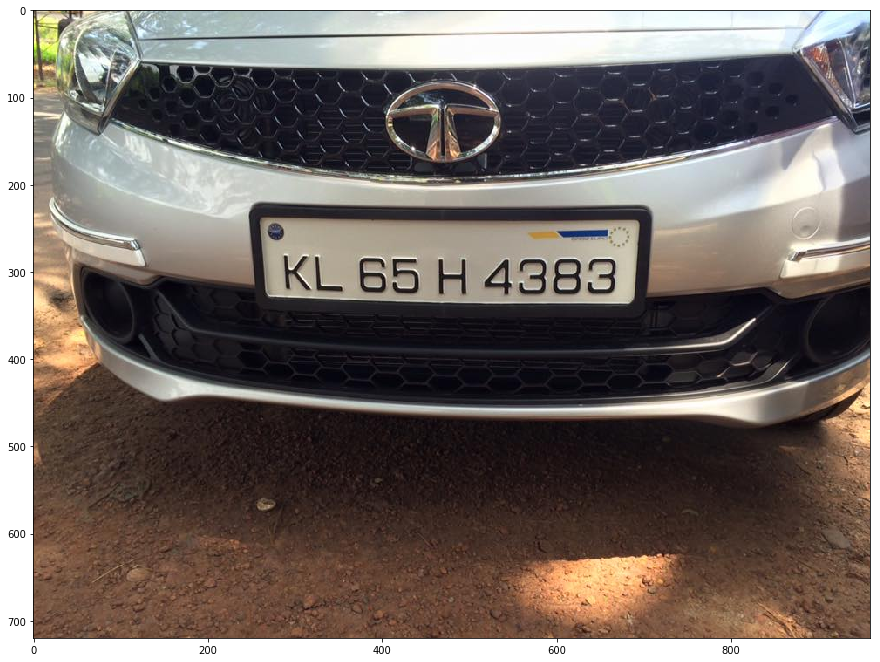

In [44]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(original_img)

In [45]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.3:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage

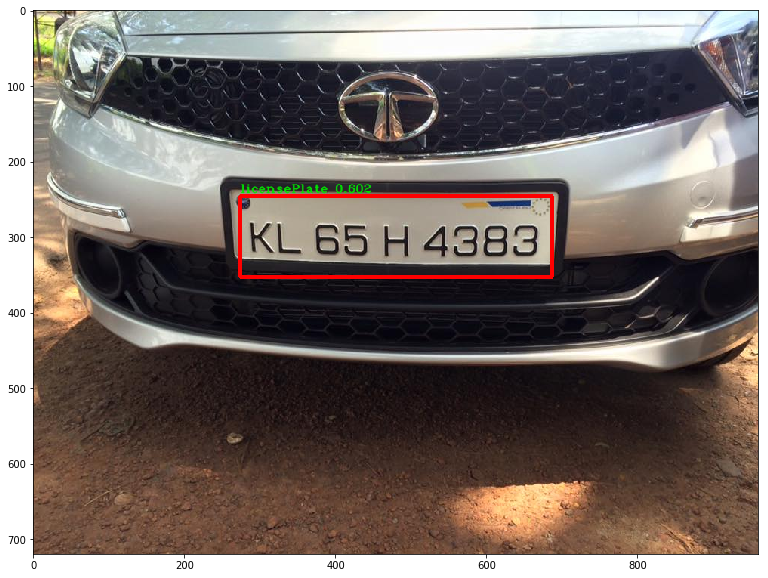

In [46]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))

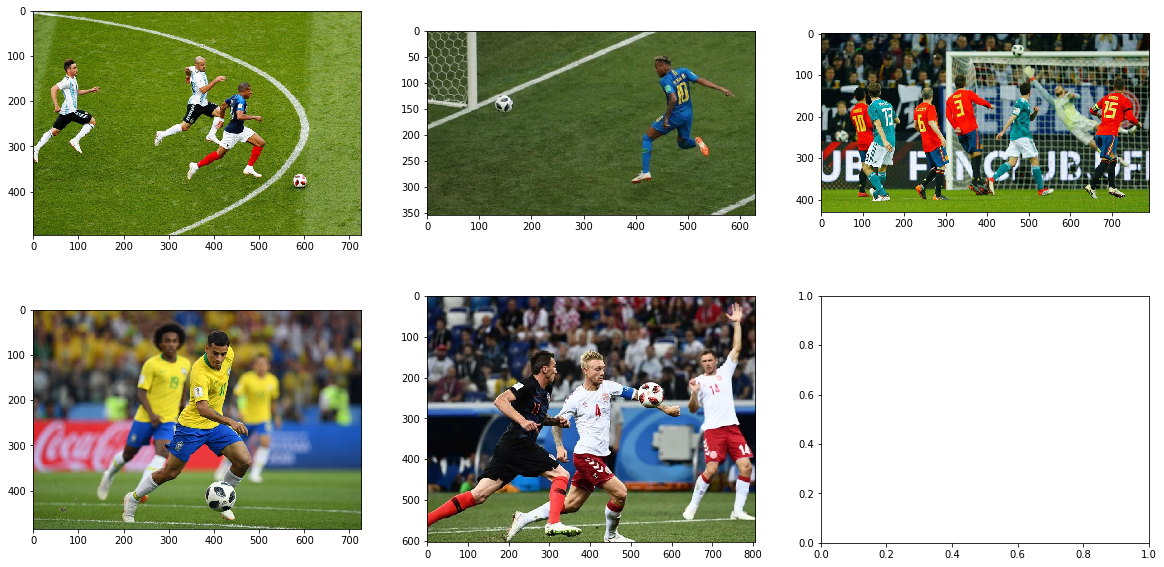

In [18]:
from math import ceil

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

for i in range(5):
    original_img = cv2.imread("sample_img/test_image" + str(i+1) + ".jpg")
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    results = tfnet2.return_predict(original_img)
    
    ax[ceil(i/3)-1, i%3].imshow(boxing(original_img, results))

## Predicting on a Video

In [33]:
import time



cap = cv2.VideoCapture('./dataset/Automated Number Plate Recognition (ANPR).mp4')
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) 
length = int(cap.get(cv2.CAP_PROP_FPS))
print( length )


fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('./custom_dataset/1.mp4',fourcc, 20.0, (int(width), int(height)))

t0 = time.time()
ret, frame = cap.read()
frame = np.asarray(frame)      
results = tfnet2.return_predict(frame)

t1 = time.time()

total = t1-t0
print(total)
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if ret == True:
        frame = np.asarray(frame)      
        results = tfnet2.return_predict(frame)
        
        new_frame = boxing(frame, results)

        # Display the resulting frame
        out.write(new_frame)
#         cv2.imshow('frame', new_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# When everything done, release the capture
cap.release()
out.release()
cv2.destroyAllWindows()

30
0.2373664379119873


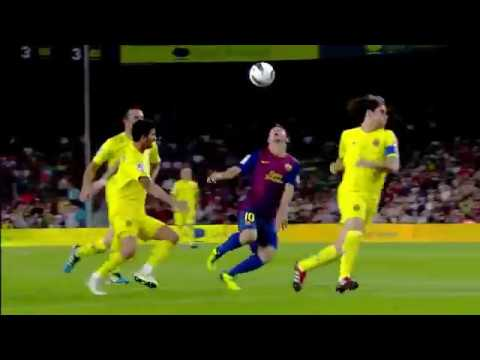

In [52]:
from IPython.display import YouTubeVideo
YouTubeVideo('1MwIVcni0P4')